# 브라질 날씨 크롤링

In [1]:
noshow = pd.read_csv("noshow.csv")

In [43]:
regions = noshow.Neighbourhood.unique()

### 구글 맵에서 위도 경도 얻기

In [45]:
from selenium import webdriver
import time

In [47]:
# 브라우져 열기
driver = webdriver.Chrome()

In [48]:
driver.get("https://www.google.co.kr/maps/@45.2000678,17.2800773,5z?hl=ko")

In [49]:
df = pd.DataFrame(columns=["region", "latitude", "longitude"])

In [50]:
for region in regions:
    driver.find_element_by_css_selector("#searchboxinput").clear()
    driver.find_element_by_css_selector("#searchboxinput").send_keys("brazil " + region)
    driver.find_element_by_css_selector("#searchbox-searchbutton").click()
    text = driver.current_url
    latitude = text.split("@")[1].split(",")[0]
    longitude = text.split("@")[1].split(",")[1]
    df = df.append({"region": region, "latitude": latitude, "longitude": longitude}, ignore_index=True)
    time.sleep(3)

### 잘못 나온 위도 경도 처리

In [52]:
df.iloc[0] = {"region": "JARDIM DA PENHA" ,"latitude": "-20.281343", "longitude": "-40.295274"}

In [53]:
df.iloc[4] = {"region": regions[4] ,"latitude": "-20.2733974", "longitude": "-40.3406367"}

In [54]:
df.iloc[5] = {"region": regions[5] ,"latitude": "-20.2881161", "longitude": "-40.3098094"}

In [55]:
df.iloc[7] = {"region": regions[7] ,"latitude": "-20.273739", "longitude": "-40.3448754"}

In [61]:
df.iloc[9] = {"region": regions[9] ,"latitude": "-20.2952282", "longitude": "-40.3402544"}

In [65]:
df.iloc[12] = {"region": regions[12] ,"latitude": "-20.2861586", "longitude": "-40.314804"}

In [59]:
df.iloc[14] = {"region": regions[14] ,"latitude": "-20.2995231", "longitude": "-40.328521"}

In [67]:
df.iloc[17] = {"region": regions[17] ,"latitude": "-20.2781114", "longitude": "-40.3373549"}

In [69]:
df.iloc[19] = {"region": regions[19] ,"latitude": "-20.2611973", "longitude": "-40.2961718"}

In [56]:
df.iloc[21] = {"region": regions[21] ,"latitude": "-20.2537888", "longitude": "-40.2841913"}

In [71]:
df.iloc[29] = {"region": regions[29] ,"latitude": "-20.3165144", "longitude": "-40.3593872"}

In [57]:
df.iloc[52] = {"region": regions[52] ,"latitude": "-20.2713921" , "longitude": "-40.3007604"}

In [73]:
df.iloc[54] = {"region": regions[54] ,"latitude": "-20.3023546" , "longitude": "-40.3089574"}

In [75]:
df.iloc[55] = {"region": regions[55] ,"latitude": "-20.2961539" , "longitude": "-40.3025394"}

In [77]:
df.iloc[56] = {"region": regions[56] ,"latitude": "-20.2933905" , "longitude": "-40.3492198"}

In [79]:
df.iloc[59] = {"region": regions[59] ,"latitude": "-20.3147219" , "longitude": "-40.3002393"}

In [81]:
df.iloc[61] = {"region": regions[61] ,"latitude": "-22.892841" , "longitude": "-43.331355"}

In [83]:
df.iloc[62] = {"region": regions[62] ,"latitude": "-20.3196743" , "longitude": "-40.3065535"}

In [85]:
df.iloc[64] = {"region": regions[64] ,"latitude": "-20.3096872" , "longitude": "-40.3247038"}

In [87]:
df.iloc[65] = {"region": regions[65] ,"latitude": "-20.3218847" , "longitude": "-40.3526047"}

In [89]:
df.iloc[69] = {"region": regions[69] ,"latitude": "-20.3195755" , "longitude": "-40.3497574"}

In [91]:
df.iloc[71] = {"region": regions[71] ,"latitude": "-20.3165487" , "longitude": "-40.3507821"}

In [93]:
df.iloc[74] = {"region": regions[74] ,"latitude": "-20.2627894" , "longitude": "-40.2983295"}

In [95]:
df.iloc[76] = {"region": regions[76] ,"latitude": "-20.3056342" , "longitude": "-40.3322169"}

In [97]:
df.iloc[78] = {"region": regions[78] ,"latitude": "-20.293387" , "longitude": "-40.3820506"}

In [99]:
df.iloc[79] = {"region": regions[79] ,"latitude": "-27.3515394" , "longitude": "-24.9854104"}

In [101]:
df.iloc[80] = {"region": regions[80] ,"latitude": "-23.4214" , "longitude": "-51.9761443"}

In [104]:
df.iloc[32] = {"region": regions[32] ,"latitude": "-20.3133965" , "longitude": "-40.3007727"}

In [106]:
df.iloc[34] = {"region": regions[34] ,"latitude": "-24.1128028" , "longitude": "-49.3448042"}

In [108]:
df.iloc[35] = {"region": regions[35] ,"latitude": "-20.2998928" , "longitude": "-40.351078"}

In [110]:
df.iloc[37] = {"region": regions[37] ,"latitude": "-23.9391134" , "longitude": "-46.7707211"}

In [112]:
df.iloc[38] = {"region": regions[38] ,"latitude": "-8.0559844" , "longitude": "-50.4998533"}

In [114]:
df.iloc[39] = {"region": regions[39] ,"latitude": "-29.4534965" , "longitude": "-52.2048193"}

In [116]:
df.iloc[40] = {"region": regions[40] ,"latitude": "-29.4815744" , "longitude": "-51.9830436"}

In [118]:
df.iloc[41] = {"region": regions[41] ,"latitude": "-20.3193827" , "longitude": "-40.3442907"}

In [120]:
df.iloc[44] = {"region": regions[44] ,"latitude": "-20.3147239" , "longitude": "-40.3558557"}

In [122]:
df.iloc[47] = {"region": regions[47] ,"latitude": "-20.305824" , "longitude": "-40.3106029"}

### csv파일로 저장

In [124]:
df.to_csv("region_location.csv")

In [126]:
import folium

### 위도 경도 시각화

In [430]:
map_osm = folium.Map(location=[-20.2832243, -40.3260221], zoom_start=4.4)

In [431]:
for i in range(len(df)):
    folium.Marker([float(df.iloc[i].latitude), float(df.iloc[i].longitude)], popup=str(df.iloc[i].region)).add_to(map_osm)

In [432]:
map_osm

### dark sky에서 날씨와 기온 정보 얻기

In [2]:
import requests

In [ ]:
# dark sky api key

In [3]:
appday = pd.to_datetime(noshow.AppointmentDay)

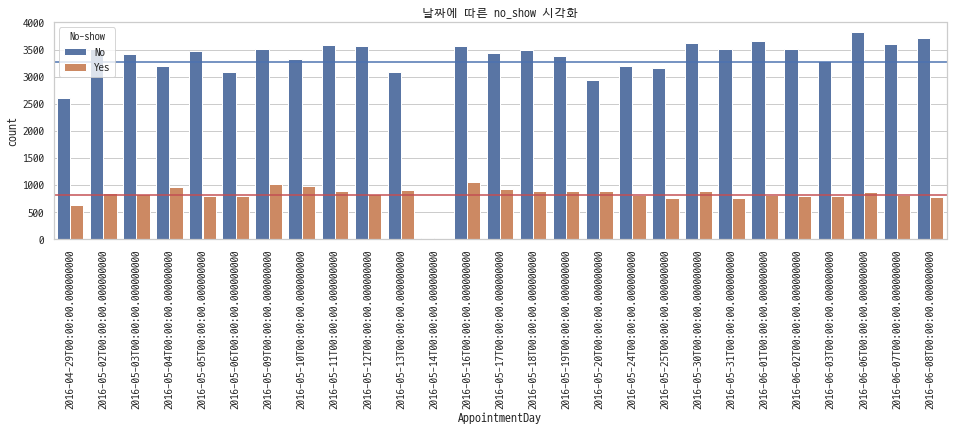

In [179]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(appday, hue=noshow["No-show"])
ax.set_title("날짜에 따른 no_show 시각화")
plt.axhline(y=826, color="r")
plt.axhline(y=3266, color="b")
plt.show()

In [180]:
a = noshow.groupby(["AppointmentDay", "No-show"]).size()

In [182]:
no_list = []
yes_list = []
for i in range(0, 54, 2):
    no_list.append(a[i])
    yes_list.append(a[i+1])

In [183]:
np.mean(no_list), np.mean(yes_list)

(3266.962962962963, 826.6296296296297)

In [184]:
unique_day = list(set([int(day.timestamp()) for day in appday]))

### dark sky 에서 날씨와 기온 정보 가져오기

In [208]:
def forecast(lat=-20.2832243, lng=-40.3260221, TOKEN=" "):
    df_weather = pd.DataFrame()
    for time in unique_day:
        for i in range(len(df)):
            lat = float(df.iloc[i].latitude)
            lng = float(df.iloc[i].longitude)
            region = str(df.iloc[i].region)
            url = "https://api.darksky.net/forecast/{}/{},{},{}?exclude=daily".format(TOKEN, lat, lng, time)
            response = requests.get(url)
            json_obj = response.json()
            try:
                df_weather = df_weather.append({"time": time, "region": region, "weather": json_obj["currently"]["summary"], "temperature": (json_obj["currently"]["temperature"] - 32) / 1.8}, ignore_index=True)
            except:
                try:
                    df_weather = df_weather.append({"time": time, "region": region, "weather": json_obj["currently"]["icon"], "temperature": (json_obj["currently"]["temperature"] - 32) / 1.8}, ignore_index=True)
                except:
                    df_weather = df_weather.append({"time": time, "region": region, "weather": None, "temperature": None}, ignore_index=True)
    return df_weather

In [291]:
df_weather.to_csv("df_weather.csv", index=False)

In [404]:
df_weather = df_weather.dropna()

### 기온과 날씨가 안나온 지역들만 뽑아내기

In [298]:
regions_nan = df_weather[df_weather.weather.isna()][:6].region.values

In [308]:
regions_nan = list(regions_nan)

In [313]:
df[df.region.isin(regions_nan)]

,region,latitude,longitude
16,SÃO BENEDITO,-9.8910754,-47.6794743
34,ITARARÉ,-24.1128028,-49.3448042
38,REDENÇÃO,-8.0559844,-50.4998533
39,SANTA CLARA,-29.4534965,-52.2048193
40,CENTRO,-29.4815744,-51.9830436
79,ILHAS OCEÂNICAS DE TRINDADE,-27.3515394,-24.9854104


In [314]:
df.iloc[16] = {"region": regions[16] ,"latitude": "-4.0479454", "longitude": "-40.8856794"}

In [315]:
df.iloc[34] = {"region": regions[34] ,"latitude": "-24.123417", "longitude": "-49.324031"}

In [316]:
df.iloc[38] = {"region": regions[38] ,"latitude": "-23.249458", "longitude": "-45.5787069"}

In [317]:
df.iloc[39] = {"region": regions[39] ,"latitude": "-29.453646", "longitude": "-52.2048194"}

In [318]:
df.iloc[40] = {"region": regions[40] ,"latitude": "-29.4816118", "longitude": "-51.9830436"}

In [319]:
df.iloc[79] = {"region": regions[79] ,"latitude": "-20.5071481", "longitude": "-29.3408058"}

In [324]:
df.to_csv("region2.csv", index=False)

In [328]:
df_nan = df[df.region.isin(regions_nan)]

In [329]:
df_nan

,region,latitude,longitude
16,SÃO BENEDITO,-4.0479454,-40.8856794
34,ITARARÉ,-24.123417,-49.324031
38,REDENÇÃO,-23.249458,-45.5787069
39,SANTA CLARA,-29.453646,-52.2048194
40,CENTRO,-29.4816118,-51.9830436
79,ILHAS OCEÂNICAS DE TRINDADE,-20.5071481,-29.3408058


In [330]:
def forecast(lat=-20.2832243, lng=-40.3260221, TOKEN="a8b883f2c78f66eb635bb6cc87207d2a"):
    df_weather_nan = pd.DataFrame()
    for time in unique_day:
        for i in range(len(df_nan)):
            lat = float(df_nan.iloc[i].latitude)
            lng = float(df_nan.iloc[i].longitude)
            region = str(df_nan.iloc[i].region)
            url = "https://api.darksky.net/forecast/{}/{},{},{}?exclude=daily".format(TOKEN, lat, lng, time)
            response = requests.get(url)
            json_obj = response.json()
            try:
                df_weather_nan = df_weather_nan.append({"time": time, "region": region, "weather": json_obj["currently"]["summary"], "temperature": (json_obj["currently"]["temperature"] - 32) / 1.8}, ignore_index=True)
            except:
                try:
                    df_weather_nan = df_weather_nan.append({"time": time, "region": region, "weather": json_obj["currently"]["icon"], "temperature": (json_obj["currently"]["temperature"] - 32) / 1.8}, ignore_index=True)
                except:
                    df_weather_nan = df_weather_nan.append({"time": time, "region": region, "weather": None, "temperature": None}, ignore_index=True)
    return df_weather_nan

In [331]:
df_weather_nan = forecast()

In [402]:
df_weather_nan = df_weather_nan.dropna()

In [344]:
region_nan2 = list(df_weather_nan[df_weather_nan.weather.isna()][:4].region.values)

In [345]:
df[df.region.isin(region_nan2)]

,region,latitude,longitude
16,SÃO BENEDITO,-4.0479454,-40.8856794
34,ITARARÉ,-24.123417,-49.324031
39,SANTA CLARA,-29.453646,-52.2048194
40,CENTRO,-29.4816118,-51.9830436


In [352]:
df.iloc[16] = {"region": regions[16] ,"latitude": "-3.754985", "longitude": "-38.616946"}

In [361]:
df.iloc[34] = {"region": regions[34] ,"latitude": "-25.297482", "longitude": "-49.511596"}

In [365]:
df.iloc[39] = {"region": regions[39] ,"latitude": "-29.905233", "longitude": "-51.312359"}

In [367]:
df.iloc[40] = {"region": regions[40] ,"latitude": "-30.0408041", "longitude": "-51.2646126"}

In [374]:
df_nan2 = df[df.region.isin(region_nan2)]

In [375]:
def forecast(lat=-20.2832243, lng=-40.3260221, TOKEN="a8b883f2c78f66eb635bb6cc87207d2a"):
    df_weather_nan2 = pd.DataFrame()
    for time in unique_day:
        for i in range(len(df_nan2)):
            lat = float(df_nan2.iloc[i].latitude)
            lng = float(df_nan2.iloc[i].longitude)
            region = str(df_nan2.iloc[i].region)
            url = "https://api.darksky.net/forecast/{}/{},{},{}?exclude=daily".format(TOKEN, lat, lng, time)
            response = requests.get(url)
            json_obj = response.json()
            try:
                df_weather_nan2 = df_weather_nan2.append({"time": time, "region": region, "weather": json_obj["currently"]["summary"], "temperature": (json_obj["currently"]["temperature"] - 32) / 1.8}, ignore_index=True)
            except:
                try:
                    df_weather_nan2 = df_weather_nan2.append({"time": time, "region": region, "weather": json_obj["currently"]["icon"], "temperature": (json_obj["currently"]["temperature"] - 32) / 1.8}, ignore_index=True)
                except:
                    df_weather_nan2 = df_weather_nan2.append({"time": time, "region": region, "weather": None, "temperature": None}, ignore_index=True)
    return df_weather_nan2

In [376]:
df_weather_nan2 = forecast()

In [377]:
df_weather_nan2

,region,temperature,time,weather
0,SÃO BENEDITO,28.377778,1.461888e+09,Humid
1,ITARARÉ,7.522222,1.461888e+09,Clear
2,SANTA CLARA,9.372222,1.461888e+09,Clear
3,CENTRO,9.311111,1.461888e+09,Clear
4,SÃO BENEDITO,28.127778,1.462234e+09,Humid and Partly Cloudy
5,ITARARÉ,12.822222,1.462234e+09,Clear
6,SANTA CLARA,14.555556,1.462234e+09,Mostly Cloudy
7,CENTRO,14.583333,1.462234e+09,Mostly Cloudy
8,SÃO BENEDITO,27.561111,1.464048e+09,Humid
9,ITARARÉ,8.822222,1.464048e+09,Partly Cloudy


###  날씨 정보 합치기

In [419]:
region_weather = pd.concat([df_weather, df_weather_nan, df_weather_nan2], ignore_index=True)

In [422]:
region_weather.to_csv("region_weather.csv", index=False)

In [ ]:
import time
region_weather.time = region_weather.time.apply(lambda x: time.strftime("%Y-%m-%d", time.localtime(int(x))))

In [426]:
df.to_csv("region_location.csv", index=False)

In [429]:
region_weather.weather.unique()

array(['Overcast', 'Mostly Cloudy', 'Clear', 'Partly Cloudy',
       'Windy and Overcast', 'Breezy and Overcast', 'Foggy',
       'Humid and Mostly Cloudy', 'Light Rain and Breezy',
       'Breezy and Mostly Cloudy', 'Humid', 'Humid and Overcast',
       'Humid and Partly Cloudy', 'Drizzle'], dtype=object)

### 화씨 -> 섭씨 공식
- °C = (°F − 32) / 1.8